In [25]:
'''
Graph and Loss visualization using Tensorboard.
This example is using the MNIST database of handwritten digits
(http://yann.lecun.com/exdb/mnist/)
Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/4_Utils/tensorboard_basic.py
'''

from __future__ import print_function

import tensorflow as tf
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
path = os.getcwd() + "/data/mnist"
print ("importing data to %s" % path)
mnist = input_data.read_data_sets(path, one_hot=True)

In [21]:
image_width = 28
image_height = 28
image_size = np.multiply(image_width, image_height)
print("image shape [%s,%s]=%s" % (image_width, image_height, image_size))


image shape [28,28]=784


7840


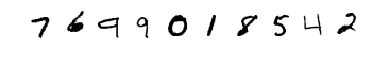

In [39]:

# display image
def display(imgs):
    n=imgs.size / image_size
    i=1
    for img in imgs:
        # (784) => (28,28)
        one_image = img.reshape(image_width,image_height)
        plt.subplot(1,n,i)
        plt.axis('off')

        plt.imshow(one_image, cmap=cm.binary)
        i=i+1

# output images
imgs=mnist.train.images[0:10]
display(imgs)

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_epoch = 1
logs_path = os.getcwd() + "/logs/mnist-softmax"

In [3]:
# tf Graph Input
# mnist data image of shape 28*28=784
x = tf.placeholder(tf.float32, [None, 784], name='InputData')
# 0-9 digits recognition => 10 classes
y = tf.placeholder(tf.float32, [None, 10], name='LabelData')

# Set model weights
#W = tf.Variable(tf.zeros([784, 10]), name='Weights')
W = tf.Variable(tf.random_normal([784, 10], mean=0, stddev=1.0), name='Weights')

b = tf.Variable(tf.zeros([10]), name='Bias')

# Construct model and encapsulating all ops into scopes, making
# Tensorboard's Graph visualization more convenient
with tf.name_scope('Model'):
    # Model
    pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax
with tf.name_scope('Loss'):
    # Minimize error using cross entropy
    cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
with tf.name_scope('SGD'):
    # Gradient Descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
with tf.name_scope('Accuracy'):
    # Accuracy
    acc = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))
    
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Create a summary to monitor cost tensor
tf.summary.scalar("loss", cost)
# Create a summary to monitor accuracy tensor
tf.summary.scalar("accuracy", acc)

tf.summary.histogram("prediction", pred)
tf.summary.histogram("weights", W)

# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()



In [4]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # op to write logs to Tensorboard
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop), cost op (to get loss value)
            # and summary nodes
            _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys})
            # Write logs at every iteration
            summary_writer.add_summary(summary, epoch * total_batch + i)
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_epoch == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")
    
    
    # Test model
    # Calculate accuracy
    #print("Accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels}))

    print("Run the command line:\n" \
          "--> tensorboard --logdir=/tmp/tensorflow_logs " \
          "\nThen open http://0.0.0.0:6006/ into your web browser")


Epoch: 0001 cost= 7.758154091
Epoch: 0002 cost= 3.932389309
Epoch: 0003 cost= 2.790082168
Epoch: 0004 cost= 2.245974067
Epoch: 0005 cost= 1.940831325
Epoch: 0006 cost= 1.743723781
Epoch: 0007 cost= 1.602755883
Epoch: 0008 cost= 1.495459414
Epoch: 0009 cost= 1.410127318
Epoch: 0010 cost= 1.339972097
Epoch: 0011 cost= 1.280830195
Epoch: 0012 cost= 1.230329288
Epoch: 0013 cost= 1.186189106
Epoch: 0014 cost= 1.147339493
Epoch: 0015 cost= 1.112954713
Epoch: 0016 cost= 1.082037269
Epoch: 0017 cost= 1.054091855
Epoch: 0018 cost= 1.028582255
Epoch: 0019 cost= 1.005373321
Epoch: 0020 cost= 0.983838976
Epoch: 0021 cost= 0.964117484
Epoch: 0022 cost= 0.945739873
Epoch: 0023 cost= 0.928477738
Epoch: 0024 cost= 0.912582558
Epoch: 0025 cost= 0.897428500
Optimization Finished!
Run the command line:
--> tensorboard --logdir=/tmp/tensorflow_logs 
Then open http://0.0.0.0:6006/ into your web browser
